In [1]:
import numpy as np

class TreeNode:
    def __init__(self, data, target):
        self.data = data               # Features for splitting
        self.target = target           # Target values
        self.left = None               # Left subtree
        self.right = None              # Right subtree
        self.split_feature = None      # Feature index to split on
        self.split_value = None        # Value to split on

class DecisionTree:
    def __init__(self, max_depth=None):
        self.root = None
        self.max_depth = max_depth

    def gini(self, targets):
        # Calculate Gini impurity
        unique_classes, class_counts = np.unique(targets, return_counts=True)
        probs = class_counts / len(targets)
        gini_impurity = 1 - np.sum(probs**2)
        return gini_impurity

    def split(self, data, target):
        best_gini = 1.0
        best_split_feature = None
        best_split_value = None
        left_data, left_target, right_data, right_target = None, None, None, None

        for feature_idx in range(data.shape[1]):
            feature_values = data[:, feature_idx]
            unique_values = np.unique(feature_values)

            for split_value in unique_values:
                left_mask = feature_values <= split_value
                right_mask = feature_values > split_value

                left_targets = target[left_mask]
                right_targets = target[right_mask]

                if len(left_targets) == 0 or len(right_targets) == 0:
                    continue

                left_gini = self.gini(left_targets)
                right_gini = self.gini(right_targets)

                weighted_gini = (len(left_targets) / len(target)) * left_gini + (len(right_targets) / len(target)) * right_gini

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_split_feature = feature_idx
                    best_split_value = split_value
                    left_data = data[left_mask]
                    left_target = target[left_mask]
                    right_data = data[right_mask]
                    right_target = target[right_mask]

        return best_split_feature, best_split_value, left_data, left_target, right_data, right_target

    def build_tree(self, data, target, depth=0):
        if depth == self.max_depth or len(np.unique(target)) == 1:
            return TreeNode(data, target)

        best_split_feature, best_split_value, left_data, left_target, right_data, right_target = self.split(data, target)

        if best_split_feature is None:
            return TreeNode(data, target)

        node = TreeNode(data, target)
        node.split_feature = best_split_feature
        node.split_value = best_split_value
        node.left = self.build_tree(left_data, left_target, depth + 1)
        node.right = self.build_tree(right_data, right_target, depth + 1)
        return node

    def fit(self, data, target):
        self.root = self.build_tree(data, target)

    def predict_single(self, node, sample):
        if node.left is None and node.right is None:
            return np.argmax(np.bincount(node.target))

        if sample[node.split_feature] <= node.split_value:
            return self.predict_single(node.left, sample)
        else:
            return self.predict_single(node.right, sample)

    def predict(self, data):
        predictions = []
        for sample in data:
            predictions.append(self.predict_single(self.root, sample))
        return predictions

# Example usage
if __name__ == "__main__":
    data = np.array([[2.7, 3.2], [3.1, 1.5], [1.1, 2.5], [5.1, 4.4], [4.4, 5.1], [3.6, 4.9]])
    target = np.array([0, 1, 0, 1, 1, 0])

    tree = DecisionTree(max_depth=2)
    tree.fit(data, target)

    test_data = np.array([[2.5, 3.0], [4.0, 4.0]])
    predictions = tree.predict(test_data)
    print(predictions)


[0, 1]


In [2]:
! pip install prince


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


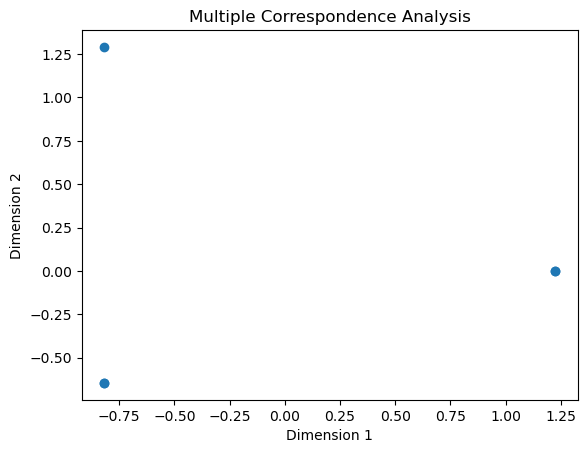

In [3]:
# Install the prince library
# pip install prince

import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt

# Load your categorical data into a DataFrame
# For demonstration purposes, let's create a sample data frame
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Age Group': ['18-24', '25-34', '35-44', '25-34', '45+'],
        'Occupation': ['Student', 'Professional', 'Student', 'Professional', 'Retired'],
        'City': ['City A', 'City B', 'City A', 'City B', 'City A']}
df = pd.DataFrame(data)

# Perform MCA
mca = MCA(n_components=2)
mca.fit(df)

# Access results
coordinates = mca.transform(df)

# Plot the results
plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1])
plt.title('Multiple Correspondence Analysis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the iris dataset (or any other dataset suitable for classification)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the decision boundaries (works only for 2D datasets)
if X_train.shape[1] == 2:
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('SVM Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


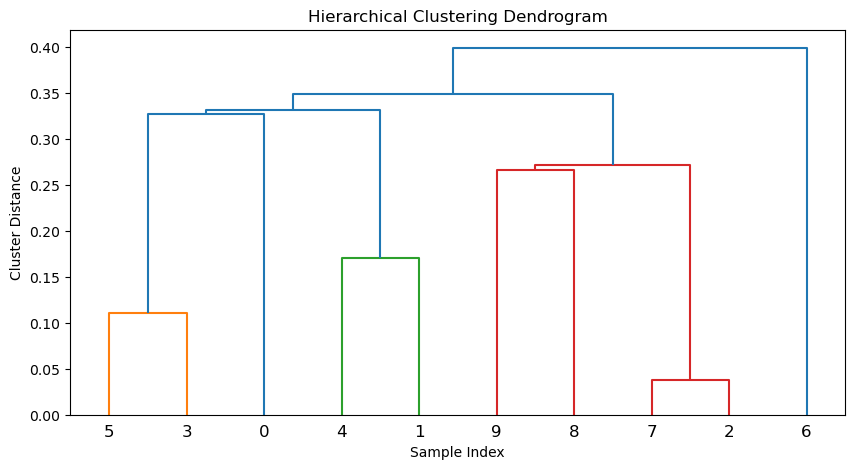

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(10, 2)

# Perform hierarchical clustering using the linkage function
# You can choose different linkage methods (e.g., 'single', 'complete', 'average')
linked = linkage(X, 'single')

# Plot the hierarchical clustering as a dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


Linear Regression Equation: y = 4.222 + 3.9684675*X
Mean Squared Error: 0.99
R-squared (R²): 0.84


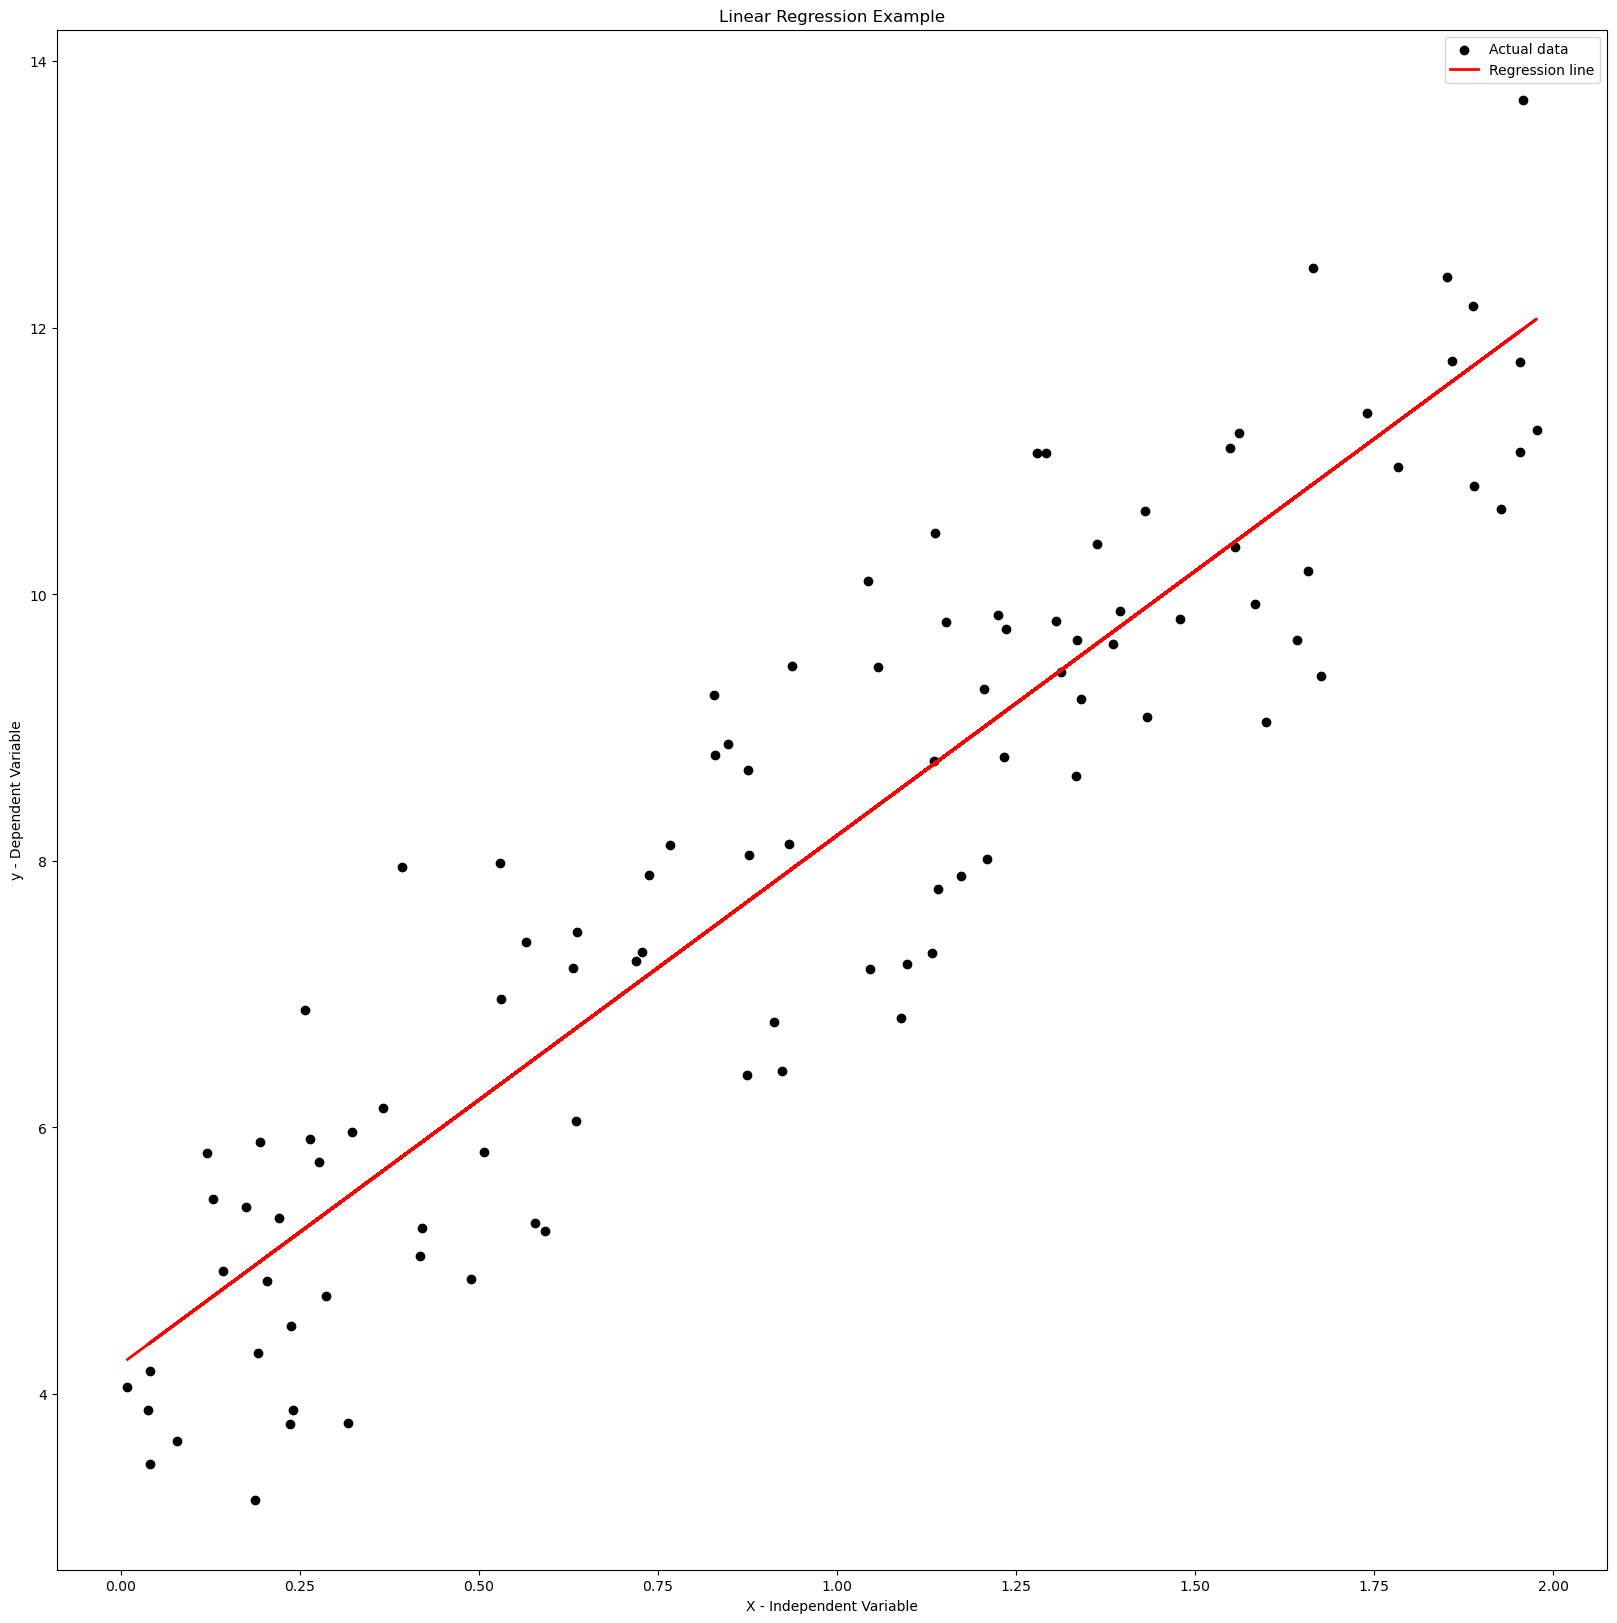

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Generate some sample data
# X: independent variable (feature), y: dependent variable (target)
np.random.seed(0)  # for reproducibility
X = 2 * np.random.rand(100, 1)   #  random points for X
y = 4 + 4 * X + np.random.randn(100, 1) 

# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Get model parameters
intercept = model.intercept_[0]
slope = model.coef_[0][0]

# Step 5: Make predictions
y_pred = model.predict(X)

# Step 6: Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Step 7: Print results
print("Linear Regression Equation: y = {:.3f} + {:.7f}*X".format(intercept, slope))
print("Mean Squared Error:", round(mse, 2))
print("R-squared (R²):", round(r2, 2))

# Step 8: Plot the data and regression line
plt.figure(figsize=(20, 20))
plt.scatter(X, y, color='black', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("X - Independent Variable")
plt.ylabel("y - Dependent Variable")
plt.title("Linear Regression Example")
plt.legend()
plt.show()


Regression Equation: y = 3.951 + 0.841*X + 3.548*X^2
Mean Squared Error: 0.97
R-squared (R²): 0.96


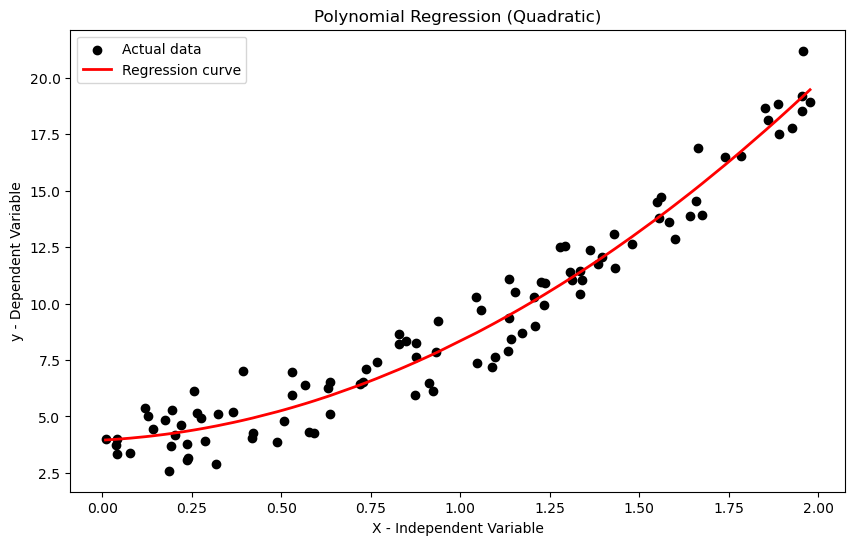

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate quadratic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)   # X values
y = 4 + 4 * (X ** 2) + np.random.randn(100, 1)  # y = 4 + 4x^2 + noise

# Step 2: Transform features for polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # Adds X^2 as a feature

# Step 3: Fit the linear regression model on transformed data
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predictions
y_pred = model.predict(X_poly)

# Step 5: Evaluate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Step 6: Print results
print("Regression Equation: y = {:.3f} + {:.3f}*X + {:.3f}*X^2".format(
    model.intercept_[0], model.coef_[0][0], model.coef_[0][1]))
print("Mean Squared Error:", round(mse, 2))
print("R-squared (R²):", round(r2, 2))

# Step 7: Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Actual data')
# Sort values for a smooth curve
X_sorted = np.sort(X, axis=0)
y_sorted_pred = model.predict(poly.transform(X_sorted))
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Regression curve')
plt.xlabel("X - Independent Variable")
plt.ylabel("y - Dependent Variable")
plt.title("Polynomial Regression (Quadratic)")
plt.legend()
plt.show()
